In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 8)}, font_scale=1.5)

In [2]:
df = pd.read_csv('../data/Synthetic_Basic/Synthetic_Basic_0.csv')
df.head()

,Unnamed: 0,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
0,2015-01-01 00:00:00-05:00,-1.0,0.0,5.1,0.0,-0.00948,1
1,2015-01-01 00:01:00-05:00,-1.0,0.0,5.1,0.0,-0.00948,1
2,2015-01-01 00:02:00-05:00,-1.0,0.0,5.1,0.0,-0.00948,1
3,2015-01-01 00:03:00-05:00,-1.0,0.0,5.1,0.0,-0.00948,1
4,2015-01-01 00:04:00-05:00,-1.0,0.0,5.1,0.0,-0.00948,1


<AxesSubplot:xlabel='time'>

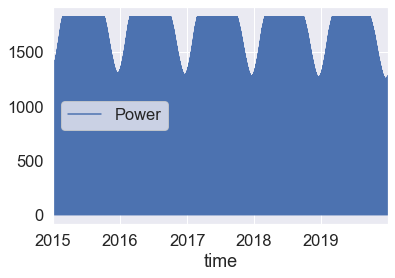

In [3]:
df = df.rename(columns={'Unnamed: 0':'time'})
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.tz_localize(None)
time_df = df.set_index('time')
time_df.plot(y='Power')

In [4]:
daily_df = time_df.resample('H').mean()

In [5]:
daily_df = daily_df.reset_index()

<AxesSubplot:xlabel='time'>

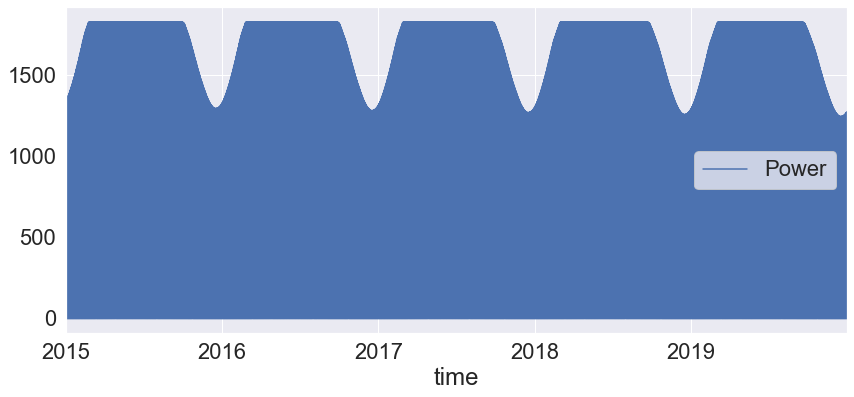

In [6]:
daily_df.plot(x='time', y='Power')

In [8]:
fb_df = daily_df[["time", "Power"]]
fb_df = fb_df.rename(columns={'time':'ds', 'Power':'y'})
fb_df["ds"] = fb_df["ds"].dt.tz_localize(None)

In [9]:
from fbprophet import Prophet

In [10]:
m = Prophet(yearly_seasonality = True, weekly_seasonality=False)
m.fit(fb_df)

In [10]:
future = pd.date_range('2015-01-01', periods=daily_df.shape[0], freq='H')
future = pd.DataFrame(future)
future = future.rename(columns={0:'ds'})


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
43819,2019-12-31 19:00:00,-277.180557,-497.174670,-66.934351
43820,2019-12-31 20:00:00,-251.967232,-456.097220,-49.535187
43821,2019-12-31 21:00:00,-211.559348,-414.001363,-0.189927
43822,2019-12-31 22:00:00,-217.284957,-416.443353,-11.277926
43823,2019-12-31 23:00:00,-254.970346,-472.280408,-50.863004


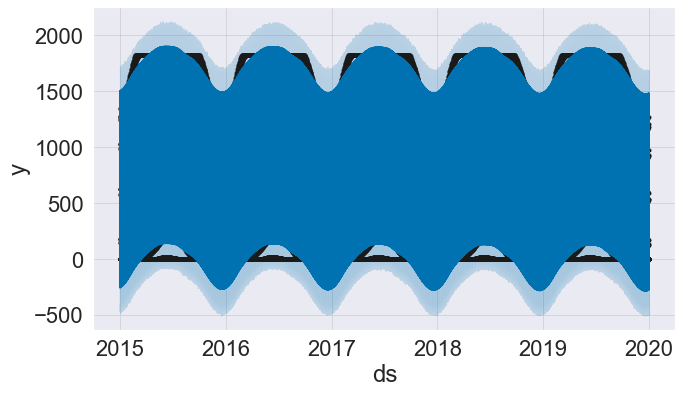

In [12]:
fig1 = m.plot(forecast)

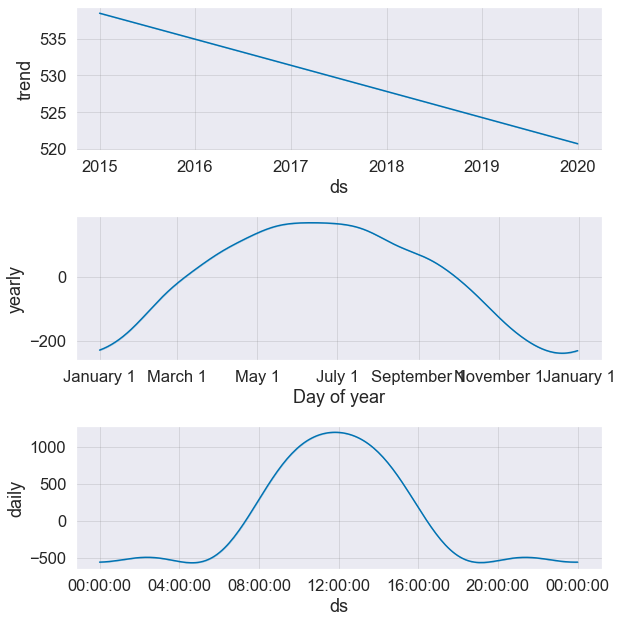

In [46]:
fig2 = m.plot_components(forecast)

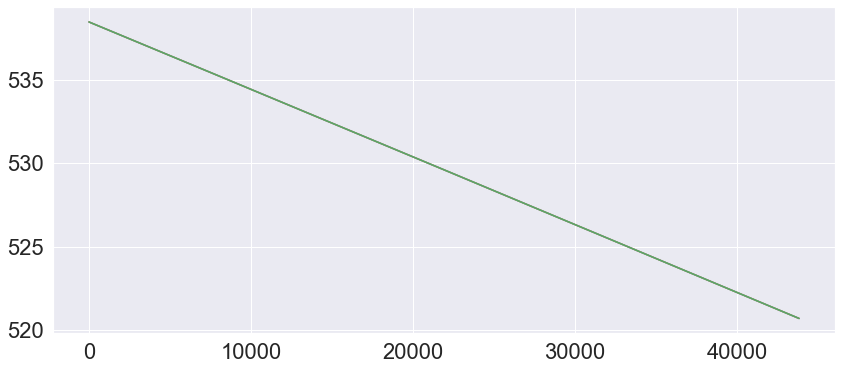

In [53]:
0.009336031315442977*100

0.9336031315442977

In [41]:
(forecast.iloc[0].trend - forecast.iloc[12409].trend)/forecast.iloc[0].trend

0.009335277925460008

In [38]:
-0.00948

ds                            2016-06-01 01:00:00
trend                                     533.473
yhat_lower                               -45.9435
yhat_upper                                367.593
trend_lower                               533.473
trend_upper                               533.473
additive_terms                           -367.105
additive_terms_lower                     -367.105
additive_terms_upper                     -367.105
daily                                    -535.421
daily_lower                              -535.421
daily_upper                              -535.421
yearly                                    168.316
yearly_lower                              168.316
yearly_upper                              168.316
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      166.368
Name: 12409, dtype: object

In [30]:
(forecast.trend[12410*4]-forecast.trend[12410*3])/forecast.trend[12410*3]

KeyError: 49640

In [42]:
df

,time,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
0,2015-01-01 00:00:00,-1.0,0.0,5.1,0.0,-0.00948,1
1,2015-01-01 00:01:00,-1.0,0.0,5.1,0.0,-0.00948,1
2,2015-01-01 00:02:00,-1.0,0.0,5.1,0.0,-0.00948,1
3,2015-01-01 00:03:00,-1.0,0.0,5.1,0.0,-0.00948,1
4,2015-01-01 00:04:00,-1.0,0.0,5.1,0.0,-0.00948,1
...,...,...,...,...,...,...,...
2629435,2019-12-31 23:55:00,-1.0,0.0,5.2,0.0,-0.00948,1
2629436,2019-12-31 23:56:00,-1.0,0.0,5.2,0.0,-0.00948,1
2629437,2019-12-31 23:57:00,-1.0,0.0,5.2,0.0,-0.00948,1
2629438,2019-12-31 23:58:00,-1.0,0.0,5.2,0.0,-0.00948,1


In [44]:
100*(0.009335277925460008-0.00948)/0.00948

-1.526604161814263